Mean Squared Error: 7.405996590820683


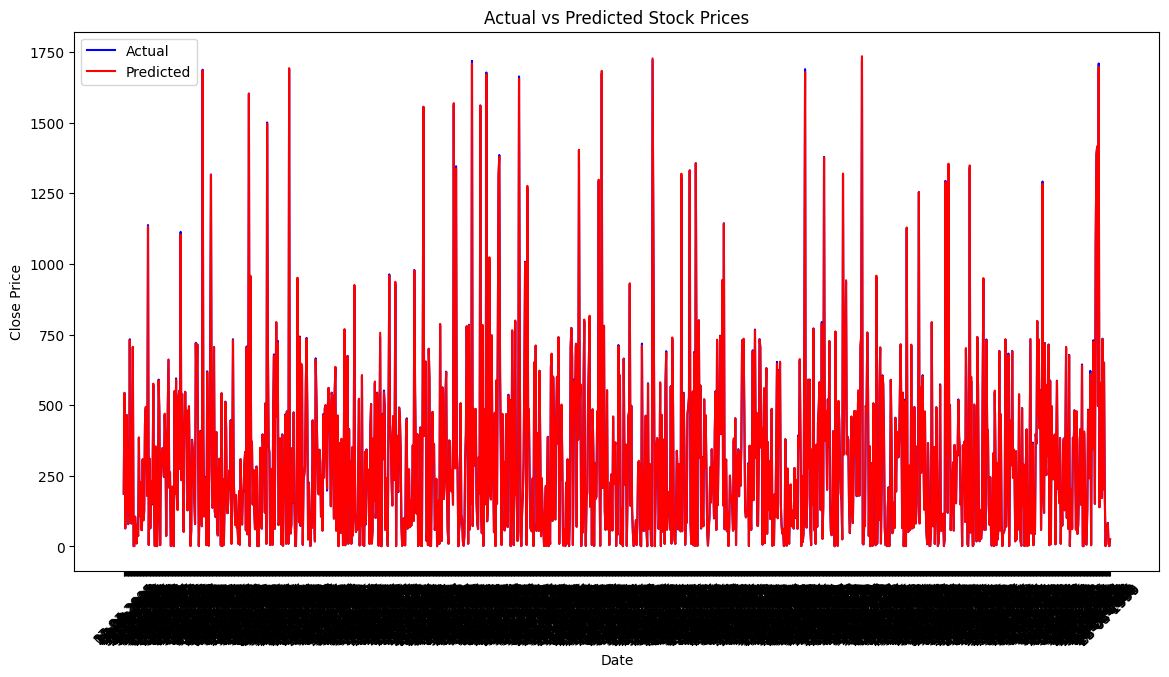

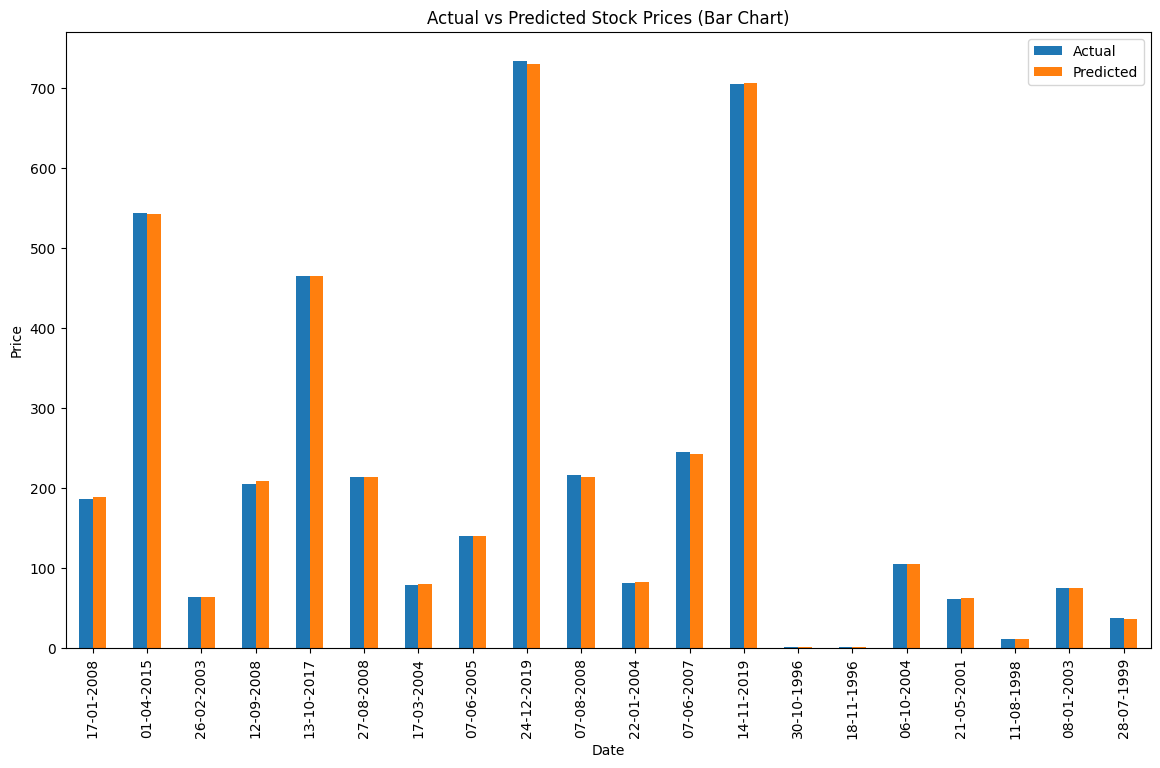

Predictions: [1.88502969e+02 5.42088277e+02 6.40561200e+01 2.08357332e+02
 4.64620242e+02 2.13832251e+02 7.94332855e+01 1.39608225e+02
 7.30371069e+02 2.13869354e+02 8.20421772e+01 2.42799498e+02
 7.06481411e+02 1.38507654e+00 1.40038253e+00 1.05452717e+02
 6.19673310e+01 1.07207694e+01 7.48721499e+01 3.67437021e+01
 3.86254625e+02 1.07151947e+02 2.25914225e+02 5.94224878e+01
 5.75870755e+01 3.09087464e+02 9.18725801e+01 1.26130466e+02
 4.34311827e+02 4.93772377e+02 3.85700292e+02 1.79213206e+02
 1.13178758e+03 5.10112663e+00 3.10193027e+02 6.43795603e+01
 2.31299656e+02 1.52207049e+02 2.17578852e+02 5.76175763e+02
 1.31978392e+02 1.36475558e+00 3.54341590e+02 5.01561266e+01
 9.89574707e-01 1.05092612e+02 5.87369737e+02 4.71229309e+02
 4.73989529e+00 3.06459943e+02 3.28590326e+02 3.47793761e+02
 2.85980928e+02 2.46531907e+02 4.69769165e+02 3.54122996e+02
 3.73140094e+01 2.94608110e+02 4.81666222e+02 6.61135512e+02
 2.08383524e+02 2.62593544e+02 1.39280202e+00 1.03431228e+02
 2.11640015

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Step 1: Load and preprocess the data
file_path = r'C:\Users\anu\Downloads\archive (3)\INFY.NS.csv'
df = pd.read_csv(file_path)

# Handle missing values
df.fillna(method='ffill', inplace=True)

# Extract features and target
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']

# Impute missing values in features
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test, dates_train, dates_test = train_test_split(
    X, y, df['Date'], test_size=0.2, random_state=42
)

# Step 2: Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 3: Make predictions
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Step 4: Plot actual vs predicted prices with dates
plt.figure(figsize=(14, 7))
plt.plot(dates_test, y_test, label='Actual', color='blue')
plt.plot(dates_test, y_pred, label='Predicted', color='red')
plt.legend()
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.show()

# Comparison DataFrame
comparison_df = pd.DataFrame({'Date': dates_test, 'Actual': y_test, 'Predicted': y_pred}).reset_index(drop=True)
comparison_df.head(20).plot(x='Date', y=['Actual', 'Predicted'], kind='bar', figsize=(14, 8))
plt.title('Actual vs Predicted Stock Prices (Bar Chart)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# Predictions on a subset of test data
my_data = X_test[:70]
my_predictions = model.predict(my_data)
print(f'Predictions: {my_predictions}')


In [5]:
print(f'Shape of X_test: {X_test.shape}')


Shape of X_test: (1301, 4)
